In [9]:
!pip install wordcloud

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import spacy

nlp = spacy.load("en_core_web_sm")

In [5]:
train = pd.read_csv(r'C:\Users\Raghu\AppData\Local\Microsoft\Windows\INetCache\IE\JN7IJL47\Jagriti\train.tsv',sep = '\t')
test = pd.read_csv(r'C:\Users\Raghu\AppData\Local\Microsoft\Windows\INetCache\IE\JN7IJL47\Jagriti\test.tsv',sep='\t')
train.drop_duplicates()
test.drop_duplicates()

,Unnamed: 0,title,text,subject,date,label
0,8104,Conservatives Will HATE What Donald Trump Just...,Donald Trump isn t exactly a stranger to makin...,News,"February 14, 2016",0
1,7467,Trump victory may create new tension between U...,Donald Trump’s U.S. election victory may creat...,politicsNews,"November 9, 2016",1
2,9473,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,A couple of quick questions come to mind when ...,politics,"Nov 9, 2017",0
3,276,"Democratic Senator Franken to resign: CNN, cit...",U.S. Democratic Senator Al Franken will announ...,politicsNews,"December 7, 2017",1
4,19274,GANG OF DOMESTIC TERRORISTS Violently Attack L...,***WARNING*** Violence is graphic***This Trump...,left-news,"Jan 21, 2017",0
...,...,...,...,...,...,...
8262,5469,Russian MP says Flynn was forced to resign to ...,A senior Russian lawmaker said on Tuesday it w...,politicsNews,"February 14, 2017",1
8263,5079,Highlights: The Trump presidency on March 7 at...,Highlights of the day for U.S. President Donal...,politicsNews,"March 7, 2017",1
8264,20425,SHOCKER! WAS MUSLIM TERRORIST GAY? Used Gay Da...,"Of course, Mateen s Muslim father vehemently d...",left-news,"Jun 13, 2016",0
8265,22063,John McCain and The Cancer of Conflict,Patrick Henningsen 21st Century WireThis week ...,US_News,"July 21, 2017",0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   title       30000 non-null  object
 2   text        30000 non-null  object
 3   subject     30000 non-null  object
 4   date        30000 non-null  object
 5   label       30000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [7]:
train['subject'].value_counts()

subject
politicsNews       7689
worldnews          6833
News               6099
politics           4346
left-news          2953
Government News    1014
US_News             536
Middle-east         530
Name: count, dtype: int64

In [8]:
train = train.drop(columns = ['Unnamed: 0','date'],axis = 1)
train

,title,text,subject,label
0,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,1
1,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,0
2,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,1
3,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,0
4,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,0
...,...,...,...,...
29995,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politicsNews,1
29996,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,1
29997,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,0
29998,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,1


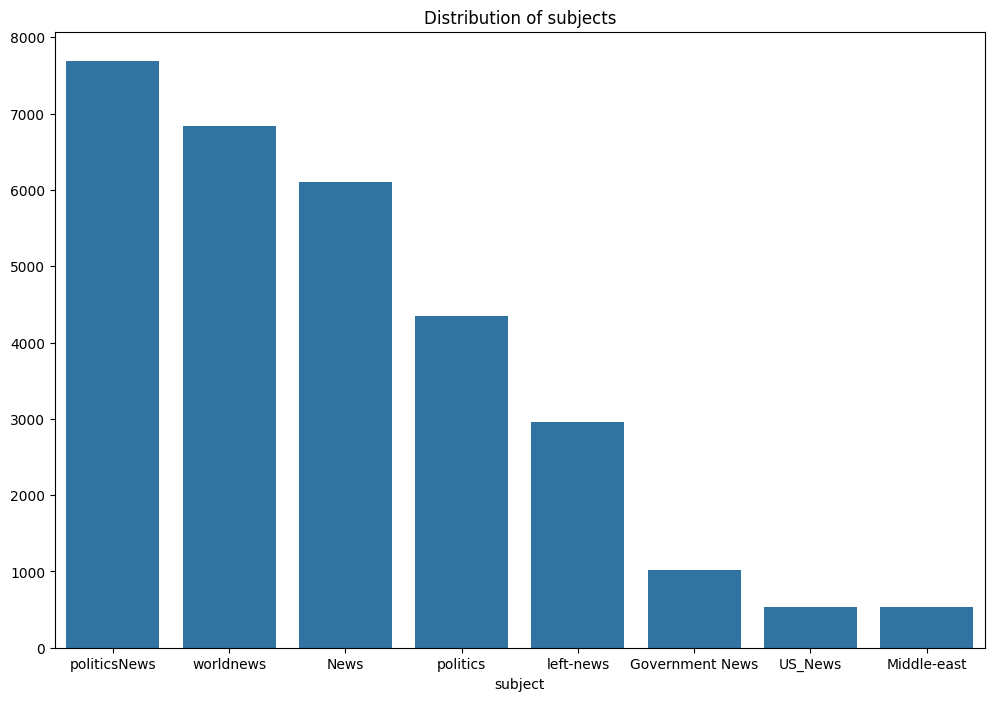

In [14]:
plt.figure(figsize=(12,8))
fig = sns.barplot(x = train['subject'].value_counts().index,y=train['subject'].value_counts().values)
plt.title("Distribution of subjects")
plt.show()

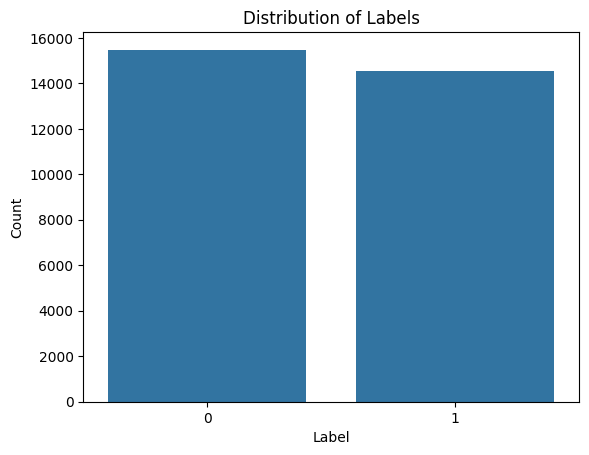

In [ ]:
sns.barplot(x=train['label'].value_counts().index, y=train['label'].value_counts().values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

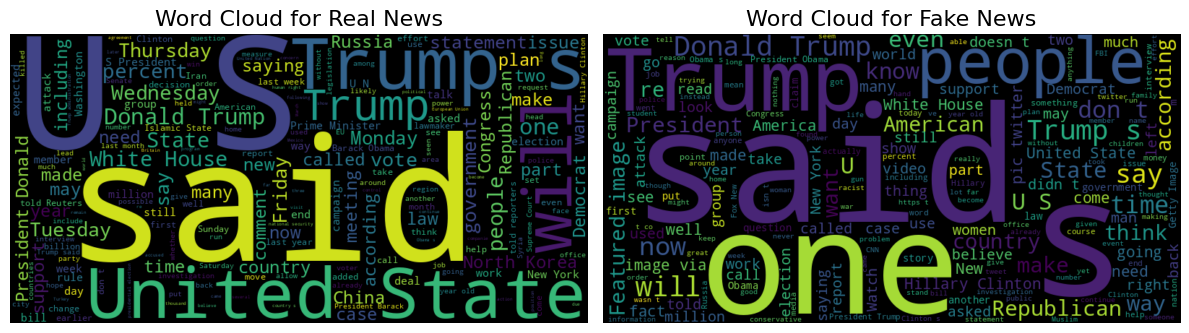

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

real_text = ' '.join(train[train['label'] == 1]['text'])
fake_text = ' '.join(train[train['label'] == 0]['text'])


real_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(real_text)
fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(fake_text)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(real_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Word Cloud for Real News', fontsize=16)


ax[1].imshow(fake_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Word Cloud for Fake News', fontsize=16)


plt.tight_layout()
plt.show()

Using the .split() method for tokenization is simple and straightforward, but it has several limitations when compared to more advanced tokenizers like those provided by spaCy or nltk. Below are the key disadvantages and limitations:

## 1. Basic Splitting (No Handling of Complex Cases)
.split(): The .split() method splits text by spaces, which works for most simple cases but fails in cases involving punctuation, contractions, special characters, or other complex scenarios.
Example: "I'm going to the store!" will be split into ["I'm", "going", "to", "the", "store!"], but ideally, I'm should be split into ["I", "am"] and the punctuation ! should be separated.
spaCy and nltk: Both libraries handle these complexities by correctly splitting contractions (I'm → ["I", "am"]), punctuation (store! → ["store", "!"]), and other linguistic features such as handling different word forms (e.g., run and running).
Example: "I'm going to the store!" would be tokenized into ["I", "'", "m", "going", "to", "the", "store", "!"] in spaCy, preserving punctuation and token structure.
## 2. Lack of Special Handling for Punctuation
.split(): It does not handle punctuation well; punctuation marks are kept attached to words. This can negatively affect downstream tasks like text classification or word embedding generation.
Example: "Hello world!" would result in ["Hello", "world!"], but you'd ideally want ["Hello", "world", "!"].
spaCy and nltk: These tokenizers separate punctuation from words.
Example: "Hello world!" would result in ["Hello", "world", "!"] in both spaCy and nltk.
## 3. Handling Contractions and Special Cases
.split(): The .split() method doesn’t understand or deal with contractions like "I'm", "it's", or "they're". These contractions will be kept as single tokens when ideally, they should be split.
Example: "I’m happy" will result in ["I’m", "happy"], which is incorrect because "I’m" should be split into ["I", "am"].
spaCy and nltk: These tokenizers correctly handle contractions by splitting them into their components.
Example: "I’m happy" will be tokenized into ["I", "'", "m", "happy"] (spaCy can also handle different kinds of contractions in more advanced ways).
## 4. Case Sensitivity and Capitalization
.split(): The .split() method does not handle capitalization issues. For instance, "Hello world" and "hello world" would be treated as two distinct tokens if case-sensitive tokenization is used.

spaCy and nltk: Both libraries can handle case sensitivity well, and they often provide normalization functions to convert all text to lowercase before tokenizing, especially in downstream NLP tasks. They also recognize named entities and may not tokenize them based on case alone.

## 5. Tokenization Consistency
.split(): The .split() method is very basic, and it won't adapt to variations in punctuation or special characters, resulting in inconsistent tokenization.

spaCy and nltk: These libraries follow standardized, sophisticated tokenization algorithms that have been trained on large datasets and can handle language-specific nuances, ensuring more consistent and accurate tokenization.

In [6]:
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "answerdotai/ModernBERT-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tf_idf = TfidfVectorizer()

nlp = spacy.load("en_core_web_sm")

class TextPreprocessing:
    def __init__(self, text: str, tokenizer, tfidf_vectorizer: TfidfVectorizer = None):
        self.text = text
        self.tokenizer = tokenizer
        self.tfidf_vectorizer = tfidf_vectorizer or TfidfVectorizer()

    @staticmethod
    def Cleaning_text(text: str) -> str:
        """
        Cleans the input text by converting to lowercase,
        removing URLs, special characters, and unnecessary spaces.
        """
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r"[^a-zA-Z\s]", '', text)
        text = re.sub(r"n't", ' not', text)
        text = re.sub(r"'s", '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    @staticmethod
    def Tokenization_text(text: str) -> list:
        """
        Tokenizes the text into a list of words, excluding punctuations and spaces.
        """
        doc = nlp(text)
        tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
        return tokens

    @staticmethod
    def Lemmatization_text(text: str) -> str:
        """
        Performs lemmatization on the text and returns the lemmatized version.
        """
        doc = nlp(text)
        lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])
        return lemmatized_text

    @staticmethod
    def Stopwords_removal(text: str) -> str:
        """
        Removes stopwords from the input text.
        """
        doc = nlp(text)
        text_without_stopwords = ' '.join([token.text for token in doc if not token.is_stop])
        return text_without_stopwords

    def ModernBert_Tokenization(self) -> dict:
        """
        Tokenizes the cleaned text using ModernBERT's tokenizer.
        """
        cleaned_text = self.Cleaning_text(self.text)
        tokenized_output = self.tokenizer(cleaned_text, return_tensors='pt', truncation=True, padding=True)
        return tokenized_output

    def Tfidf_Transformation(self, texts: list) -> np.ndarray:
        """
        Applies TF-IDF transformation to a list of texts.

        Args:
            texts (list of str): List of text strings to apply the TF-IDF transformation.

        Returns:
            np.ndarray: TF-IDF feature matrix.
        """
        tfidf_matrix = self.tfidf_vectorizer.fit_transform(texts)
        return tfidf_matrix.toarray()

    def BagOfWords_Transformation(self, texts: list) -> np.ndarray:
        """
        Applies Bag of Words (BoW) transformation to a list of texts.

        Args:
            texts (list of str): List of text strings to apply the BoW transformation.

        Returns:
            np.ndarray: Bag of Words feature matrix.
        """
        vectorizer = CountVectorizer()
        bow_matrix = vectorizer.fit_transform(texts)
        return bow_matrix.toarray()

    def Ngram_Transformation(self, texts: list, ngram_range=(1, 2)) -> np.ndarray:
        """
        Applies N-gram transformation (uni-grams, bi-grams, etc.) to a list of texts.

        Args:
            texts (list of str): List of text strings to apply the N-gram transformation.
            ngram_range (tuple): The range of n-values for n-grams to extract. Default is (1, 2) for unigrams and bigrams.

        Returns:
            np.ndarray: N-gram feature matrix.
        """
        vectorizer = CountVectorizer(ngram_range=ngram_range)
        ngram_matrix = vectorizer.fit_transform(texts)
        return ngram_matrix.toarray()

    def Word2Vec_Transformation(self, texts: list, model: Word2Vec = None) -> np.ndarray:
        """
        Converts the text into Word2Vec vectors. If the model is not provided,
        it will use a default pre-trained Word2Vec model.

        Args:
            texts (list of str): List of text strings to apply the Word2Vec transformation.
            model (Word2Vec): The trained Word2Vec model. If None, a new one will be trained.

        Returns:
            np.ndarray: Word2Vec feature matrix.
        """
        if model is None:
            model = Word2Vec(sentences=[text.split() for text in texts], vector_size=100, window=5, min_count=1, workers=4)

        word2vec_matrix = []
        for text in texts:
            vector = np.mean([model.wv[word] for word in text.split() if word in model.wv], axis=0)
            word2vec_matrix.append(vector)

        return np.array(word2vec_matrix)

    def GloVe_Transformation(self, texts: list, glove_model: KeyedVectors) -> np.ndarray:
        """
        Converts the text into GloVe vectors using a pre-trained GloVe model.

        Args:
            texts (list of str): List of text strings to apply the GloVe transformation.
            glove_model (KeyedVectors): Pre-trained GloVe model.

        Returns:
            np.ndarray: GloVe feature matrix.
        """
        glove_matrix = []
        for text in texts:
            vector = np.mean([glove_model[word] for word in text.split() if word in glove_model], axis=0)
            glove_matrix.append(vector)

        return np.array(glove_matrix)


/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from pprint import pprint
pprint(tokenizer)

PreTrainedTokenizerFast(name_or_path='answerdotai/ModernBERT-base', vocab_size=50280, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("|||IP_ADDRESS|||", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	1: AddedToken("<|padding|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50254: AddedToken("                        ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50255: AddedToken("                       ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50256: AddedToken("                      ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50257: Added

In [6]:
test.isna().sum()

,0
Unnamed: 0,0
title,0
text,0
subject,0
date,0
label,0


In [7]:
test = test.dropna()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

train = train.dropna(subset=['label'])
text_preprocessor = TextPreprocessing(text = None,tokenizer = None)
cleaned_text = [text_preprocessor.Cleaning_text(text)  for text in train["text"]]
bow_features = text_preprocessor.BagOfWords_Transformation(cleaned_text)

X_train, X_test, y_train, y_test = train_test_split(bow_features, train['label'], test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8261
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       326
         1.0       0.83      0.78      0.80       272

    accuracy                           0.83       598
   macro avg       0.83      0.82      0.82       598
weighted avg       0.83      0.83      0.83       598



In [ ]:
train = train.dropna(subset=['label'])
text_preprocessor = TextPreprocessing(text = None,tokenizer = None)
cleaned_text = [text_preprocessor.Cleaning_text(text)  for text in train["text"]]
tfidf_vectors = text_preprocessor.Tfidf_Transformation(cleaned_text)
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, train['label'], test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8593
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1001
         1.0       0.88      0.83      0.85       953

    accuracy                           0.86      1954
   macro avg       0.86      0.86      0.86      1954
weighted avg       0.86      0.86      0.86      1954



In [10]:
test.iloc[8262]

Unnamed: 0                                                 5469
title         Russian MP says Flynn was forced to resign to ...
text          A senior Russian lawmaker said on Tuesday it w...
subject                                            politicsNews
date                                         February 14, 2017 
label                                                         1
Name: 8262, dtype: object

Accuracy: 0.9573
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3137
           1       0.95      0.96      0.96      2863

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000

Model and vectorizer saved successfully.


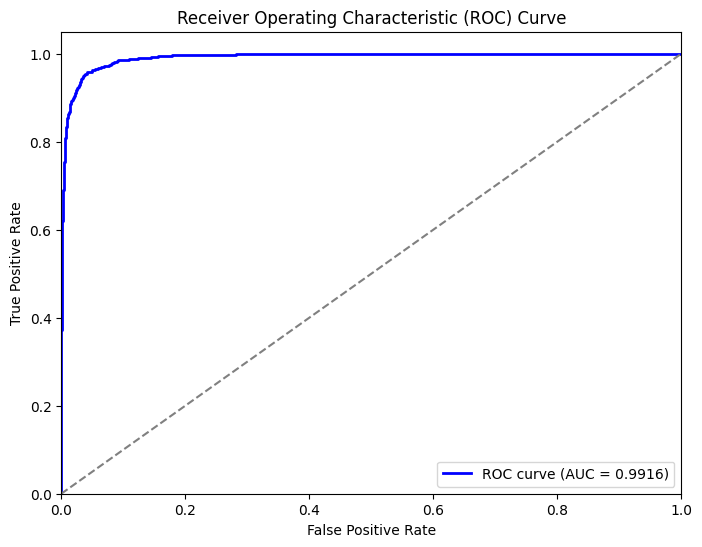

In [40]:
from sklearn.metrics import roc_curve, auc
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

train['cleaned_text'] = train['text'].apply(lambda x: TextPreprocessing.Cleaning_text(x))

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))


X = tfidf_vectorizer.fit_transform(train['cleaned_text'])
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

with open('mnb_model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

print("Model and vectorizer saved successfully.")

y_prob = mnb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [1]:
test.iloc[8262]

NameError: name 'test' is not defined

In [36]:
import gradio as gr
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the saved vectorizer and model
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

with open('mnb_model.pkl', 'rb') as model_file:
    mnb = pickle.load(model_file)

# Preprocessing function
def preprocess_text(text):
    text_preprocessor = TextPreprocessing(text=None, tokenizer=None)
    cleaned_text = text_preprocessor.Cleaning_text(text)
    return cleaned_text

# Prediction function
def predict_news(text):
    cleaned_text = preprocess_text(text)
    X_input = tfidf_vectorizer.transform([cleaned_text])
    prediction = mnb.predict(X_input)
    return "Fake News" if prediction == 0 else "Real News"

# Gradio interface
iface = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=7, placeholder="Enter the news article here..."),
    outputs="text",
    title="Fake News Classification",
    description="Classify news articles as real or fake."
)

# Launch the interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://19d217cec6d3fd5c36.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
